# Data Exploration

In [286]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')
s=set()
s=list(s)
# Only select two values in the dependent variable to make it binary classification problem
df=df[df['variety'].isin(['Setosa', 'Versicolor'])]

In [287]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [288]:
# Plot the data
import matplotlib.pyplot as plt
df_feature=df[['sepal.length','petal.length', 'variety']]

setosa_x=df_feature[df_feature['variety']=='Setosa']['sepal.length']
versicolor_x=df_feature[df_feature['variety']=='Versicolor']['sepal.length']

setosa_y=df_feature[df_feature['variety']=='Setosa']['petal.length']
versicolor_y=df_feature[df_feature['variety']=='Versicolor']['petal.length']

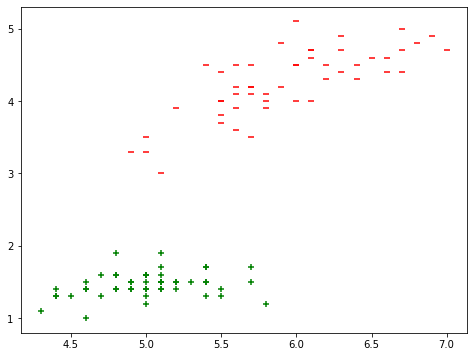

In [289]:
plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [297]:
# Generate dataset to fit into the model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
target=df_feature['variety']
Y=[]
for val in target:
    if val=='Setosa':
        Y.append(-1)
    else:
        Y.append(1)
X=np.array(df_feature[['sepal.length','petal.length']])
# Normalized the data
from sklearn.preprocessing import MinMaxScaler
X_normalized=MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_normalized)

In [298]:
X,Y=shuffle(X,Y)

In [299]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

# Support Vector Machine Model

## Use sklearn

In [405]:
from sklearn import svm

# Create a svm Classifier. Let give it a big C to make it hard margin 
clf=svm.SVC(kernel='linear', C=100)

In [406]:
# Train the model using the training sets
clf.fit(x_train, y_train)

SVC(C=100, kernel='linear')

In [407]:
y_pred=clf.predict(x_test)

In [409]:
y_test

[1, -1, 1, 1, -1, -1, 1, 1, -1, -1]

In [411]:
y_pred

array([ 1, -1,  1,  1, -1, -1,  1,  1, -1, -1])

## Map the SVM Result

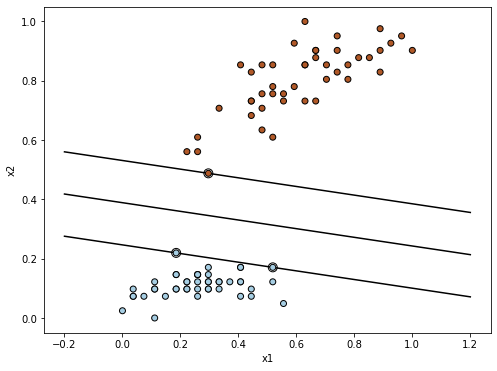

In [422]:
xx = np.linspace(-0.2, 1.2)
yy = a * xx-(clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(x_train[0], x_train[1], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# SVM Result Investigation

In [257]:
# SVM image from wikipedia

<img src="1920px-SVM_margin.png" width="608" height="456" style="float:left"/>

## coef_

In [412]:
# w here is the vector w showing in the chart above
# a, b are the parameters for hyperlane equation, a is the slope while b is the intercept
w=clf.coef_[0]
a=-w[0]/w[1]
b=(clf.intercept_[0])/w[1]

In [413]:
print(w)

[1.02620138 7.02691006]


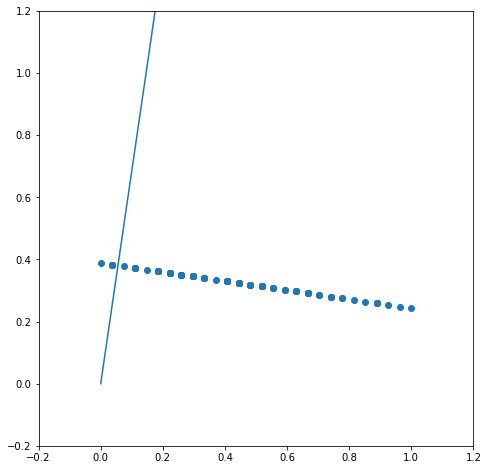

In [414]:
# W vector is perpendicular with the hyperlane
plt.figure(figsize=(8,8))
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
# ax-b is the hyperlane equation, so if we plot it using x_train data point, it would be perpedicular with w vector
plt.scatter(x_train[0], a*x_train[0]-b)
plt.plot([0,w[0]], [0,w[1]])

In [415]:
# w is the vector that control the direction of classification hyperlane and the width of margin
# w is the coordinates so maginitude of w, i.e ||w|| would be sqrt(x^2+y^2) 
w_magnitude=np.sqrt(np.sum(clf.coef_ ** 2))
print(w_magnitude)
# margin would be 2/||w||
margin=2/w_magnitude
print(margin)

7.10144733820889
0.2816327298857975


In [425]:
# Previously we have proved from the formula that the magnitude of vector w will determine the margin
# Now let's have a look of it visually
# If I inflate w magnititude through multiplying the vector by 2, let's see how the classification boundary will change
w2=w*2
# at the same time, the intercept should multiply 2 too

In [437]:
# As you can see a won't change which mean the classification boundary shape won't change
# b won't change mean the classification boundary position won't change
print(a)
a2=-w[0]/w[1]
print(a2)
print(b)
b2=(clf.intercept_[0]*2)/w2[1]
print(b2)

-0.14603878129275638
-0.14603878129275638
-0.3887992292266996
-0.3887992292266996


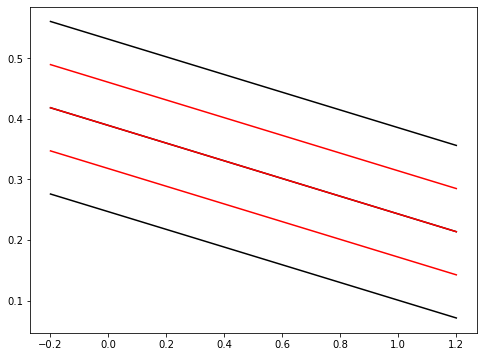

In [436]:
# Then we could see, change the magnitude of w wont't change classification boundary, but it would change the margin
xx = np.linspace(-0.2, 1.2)
yy = a * xx-(clf.intercept_[0]) / w[1]
yy2= a2 * xx-(clf.intercept_[0]*2) / w2[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
margin2 = 1 / np.sqrt(np.sum(w2 ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
yy_down2 = yy2-np.sqrt(1 + a2 ** 2) * margin2
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin2
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.plot(xx, yy2, "k-", c='red')
plt.plot(xx, yy_down2, "k-", c='red')
plt.plot(xx, yy_up2, "k-", c='red')
plt.show()

## support_vectors_

In [423]:
# For the support vector machine model, the points with different classification but close to each other has big impact on 
# decisding classification boundary. These observations were called support vectors
# In sklearn SVM model, you could call support_vectors_ function to get these points
print(clf.support_vectors_)

[[0.18518519 0.2195122 ]
 [0.51851852 0.17073171]
 [0.2962963  0.48780488]]


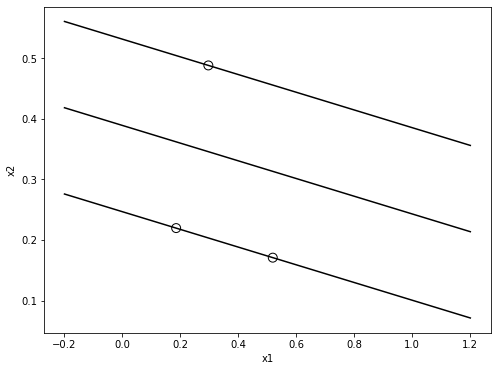

In [424]:
# If we map them, you could see they are the points that fall into the 2 hyperlane
xx = np.linspace(-0.2, 1.2)
yy = a * xx-(clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## support_

In [446]:
# support_ attributes will return the index of these support vector observations
np.array(x_train)[clf.support_]

array([[0.18518519, 0.2195122 ],
       [0.51851852, 0.17073171],
       [0.2962963 , 0.48780488]])

## n_support_

In [448]:
# n_support_ would get you numbers of the support vectors in each class
# which we could see from the chart that one class has 2 support vectors and another has 1
clf.n_support_

array([2, 1])

## decision_function

In [416]:
XT=np.array(x_train).T

In [417]:
# w*x-b is the distance from everypoint to the hyperlanes
# it is the decision_function result
# When the result>=1 it would be predicted as one class, and result<=-1 would be another class
clf.coef_.dot(XT)+clf.intercept_[0]

array([[-2.17988561, -1.5710573 ,  3.85528567, -1.45703492,  3.72190507,
        -1.64707221,  4.0073155 ,  4.12204685, -1.93248264,  4.2934349 ,
         4.06468117, -1.70443789, -1.45703492, -0.99952747, -2.06586323,
        -1.95184086,  3.11307676,  2.7322932 ,  1.47592015, -2.17988561,
        -1.93248264, -1.81846026, -1.11425882,  1.43791269,  2.08474846,
        -1.4376767 , -1.34301254,  4.38880803,  4.73087516,  2.8656738 ,
         3.05571109,  3.64589016, -1.64707221,  4.52147965, -1.81916924,
        -1.5710573 , -1.59041551, -1.76180356, -1.53304984,  3.68460659,
        -1.00023644,  4.63550203,  4.36944982,  3.0750693 , -2.61803484,
         2.5228977 , -1.51369162, -1.49504238, -1.7804528 , -1.4376767 ,
         0.99976346, -1.81846026,  4.71222592,  2.21812905,  3.76062151,
        -1.74244535,  4.27407668,  4.94097964,  3.09371855,  2.58026337,
        -1.53304984,  4.2934349 , -1.11425882, -1.39966925,  5.0356438 ,
        -2.56066917, -2.00849756, -1.85646772,  3.9

In [418]:
clf.decision_function(x_train)

array([-2.17988561, -1.5710573 ,  3.85528567, -1.45703492,  3.72190507,
       -1.64707221,  4.0073155 ,  4.12204685, -1.93248264,  4.2934349 ,
        4.06468117, -1.70443789, -1.45703492, -0.99952747, -2.06586323,
       -1.95184086,  3.11307676,  2.7322932 ,  1.47592015, -2.17988561,
       -1.93248264, -1.81846026, -1.11425882,  1.43791269,  2.08474846,
       -1.4376767 , -1.34301254,  4.38880803,  4.73087516,  2.8656738 ,
        3.05571109,  3.64589016, -1.64707221,  4.52147965, -1.81916924,
       -1.5710573 , -1.59041551, -1.76180356, -1.53304984,  3.68460659,
       -1.00023644,  4.63550203,  4.36944982,  3.0750693 , -2.61803484,
        2.5228977 , -1.51369162, -1.49504238, -1.7804528 , -1.4376767 ,
        0.99976346, -1.81846026,  4.71222592,  2.21812905,  3.76062151,
       -1.74244535,  4.27407668,  4.94097964,  3.09371855,  2.58026337,
       -1.53304984,  4.2934349 , -1.11425882, -1.39966925,  5.0356438 ,
       -2.56066917, -2.00849756, -1.85646772,  3.91265134,  2.97

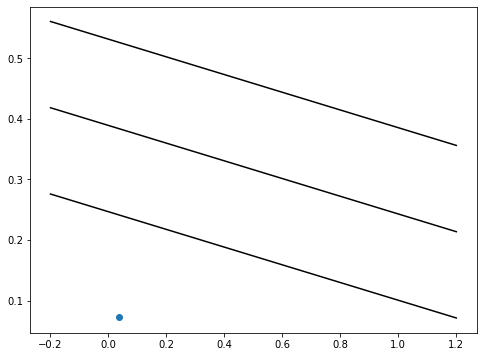

In [419]:
one_case=np.array(x_train)[0]
# Map it to decision boundary
xx = np.linspace(-0.2, 1.2)
yy = a * xx-(clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2)) # acutually is it half margin lol
yy_down = yy-np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(figsize=(8,6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(one_case[0], one_case[1])

In [ ]:
# for a hyperlane with equation wx+b, b actually is the scaler.
# Decision function is a rescaled measure (rescale by scaler b) of how far the a point to the hyperlane 
# If we would like to calculate the absolute distance from a case to the hyperlane, we would need to scale it back
# Therefore, D(x0)=|f(x0)| / sqrt(w⋅w). f(x0) is the result get from decision function
# Let calculate it

In [456]:
abs(clf.decision_function(x_train)[0])/math.sqrt(w.dot(w.T))

0.3069635671038061

In [457]:
# Let calculate the distance from a point to a line to verify

In [458]:
def shortest_distance(x1, y1, a, b, c): 
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    print(d)

In [459]:
shortest_distance(one_case[0], one_case[1], a, -1, -b)

0.30696356710380623
